# Shapiro-Wilk 검정

## 필요한 모듈 불러오기 

In [1]:
from scipy.stats import shapiro
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
from scipy.stats import pearsonr
from datetime import datetime, timedelta

## 데이터셋

### 테스트용 데이터셋

In [2]:
# 정규분포를 띄는 데이터셋 생성

def generate_normal_list(mean, std, size):
    data_list = np.random.normal(mean, std, size)
    plt.hist(data_list, bins=30)
    plt.show()
    return data_list

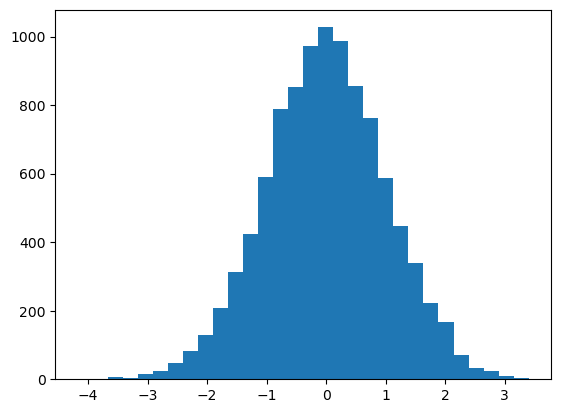

In [3]:
data2 = generate_normal_list(0, 1, 10000)

### 실제 데이터셋

In [4]:
%cd /Users/admin/Desktop/Life/DataSet_230605/datasets-KOSPI200

/Users/admin/Desktop/Life/DataSet_230605/datasets-KOSPI200


In [8]:
df = pd.read_csv('dataset-KOSPI200-323410 KS.csv') # 323410 카카오뱅크
df2 = pd.read_csv('dataset-KOSPI200-377300 KS.csv') # 377300 카카오페이

In [ ]:
df2.tail()

In [9]:
# date를 datetime 객체로 만들어 index로 사용하기

def to_datetime_index(df):
    df['date'] = pd.to_datetime(df['date'])
    df_dt = df.set_index('date', inplace=False)
    return df_dt

In [10]:
df_dt = to_datetime_index(df)
df2_dt = to_datetime_index(df2)

In [11]:
# MOV_AVG_5D에 대한 CHG_PCT_1D 열 만들기

def make_ma5_cp1(df):
    df_ma5_cp1 = df.copy()
    df_ma5_cp1['MA5_CP1'] = df_ma5_cp1['MOV_AVG_5D'].pct_change()
    return df_ma5_cp1

In [12]:
df_dt_ma5_cp1 = make_ma5_cp1(df_dt)

In [13]:
df2_dt_ma5_cp1 = make_ma5_cp1(df2_dt)

In [14]:
df2_dt_ma5_cp1.head(10)

,PX_OPEN,PX_LOW,PX_HIGH,PX_LAST,VOLUME,MOV_AVG_5D,CHG_PCT_1D,MA5_CP1
date,,,,,,,,
2021-11-02,90000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-03,193000.0,180000.0,173000.0,230000.0,11799881.0,NaN,114.4444,NaN
2021-11-04,169000.0,190000.0,166000.0,191000.0,3487030.0,NaN,-12.4352,NaN
2021-11-05,170000.0,167500.0,167500.0,179000.0,1597937.0,NaN,0.5917,NaN
2021-11-08,153500.0,168500.0,152000.0,169500.0,1394625.0,155100.0,-9.7059,NaN
2021-11-09,147000.0,153500.0,146000.0,157500.0,892617.0,166500.0,-4.2345,0.073501
2021-11-10,150500.0,148000.0,147000.0,153500.0,615031.0,158000.0,2.3810,-0.051051
2021-11-11,145500.0,148000.0,140000.0,150000.0,768779.0,153300.0,-3.3223,-0.029747
2021-11-12,157500.0,146000.0,146000.0,158000.0,705982.0,150800.0,8.2474,-0.016308


## 정규성 검정 수행 

In [15]:
# 정규성 검정 수행

class normality_test:
    def __init__(self, data: list):
        self.data = data
        self.shapiro_test()
        self.qqplot_test()
        self.hist_test()
        
    def shapiro_test(self):
        self.statistic, self.p_value = shapiro(self.data) # Shapiro-Wilk 정규성 검정 수행 
        print("Shapiro-Wilk 검정 통계량:", self.statistic)
        print("p-value:", self.p_value) # p-value가 일반적으로 0.05보다 크면 데이터가 정규분포를 따른다는 귀무가설을 기각하지 않습니다.
        
    def qqplot_test(self): 
        # QQ plot은 데이터의 분위수와 이론적인 정규분포의 분위수를 비교하여 데이터가 정규분포에 얼마나 잘 부합하는지를 보여줍니다.
        sm.qqplot(self.data, line='s') # QQ plot 그리기
        plt.title('QQ Plot')
        plt.show() # 데이터가 정규분포를 따른다면, 점들이 대각선에 가깝게 분포될 것입니다.

    def hist_test(self):
        plt.hist(self.data, bins=100)
        plt.title('Histogram')
        plt.show()

In [16]:
# 주식 가격, 수익률, 로그 수익률 정규성 비교

# shapiro test 결과 -> 이상함 (data의 개수가 500개 밖에 안 돼서?)
# qqplot, histogram 봤을 때는 로그 수익률일 가장 정규성을 따름

def test_3list(df):
    sr_px_last = df['PX_LAST'].iloc[1:]
    sr_chg_pct = df['CHG_PCT_1D'].iloc[1:]
    log_chg_pct = pd.Series([np.log(1+x/100) for x in sr_chg_pct.tolist()])
    
    return normality_test(sr_px_last), normality_test(sr_chg_pct), normality_test(log_chg_pct)

Shapiro-Wilk 검정 통계량: 0.8385613560676575
p-value: 1.394529189795459e-19


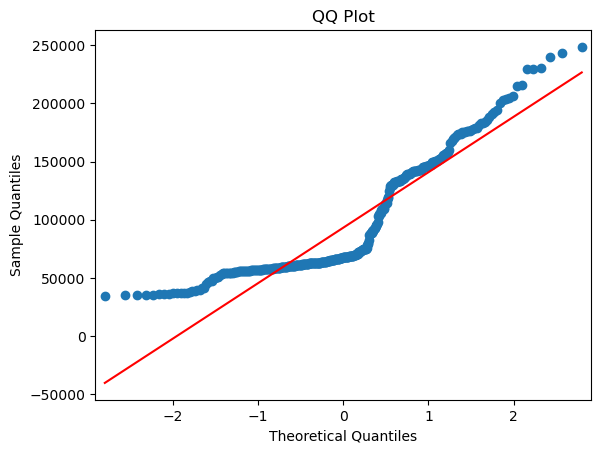

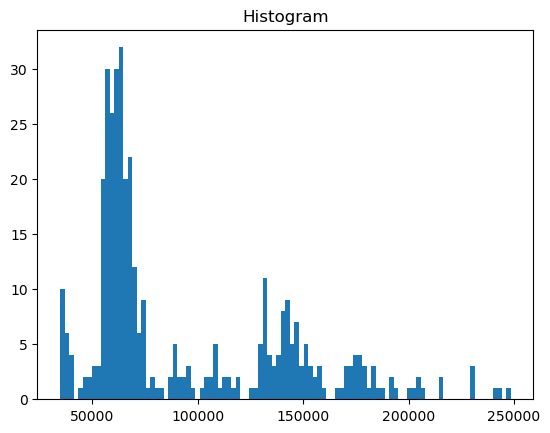

Shapiro-Wilk 검정 통계량: 0.4529303312301636
p-value: 7.697397087309458e-33


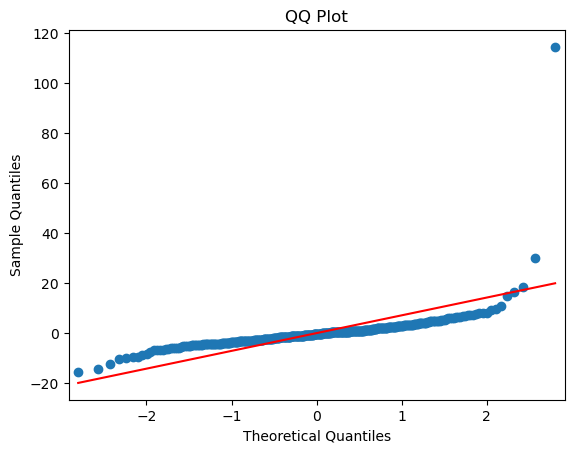

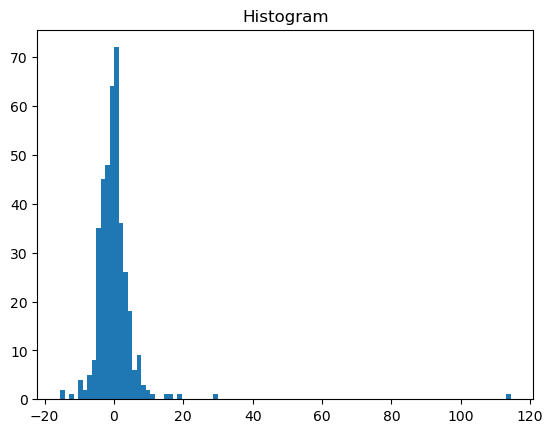

Shapiro-Wilk 검정 통계량: 0.6325012445449829
p-value: 4.041513432635574e-28


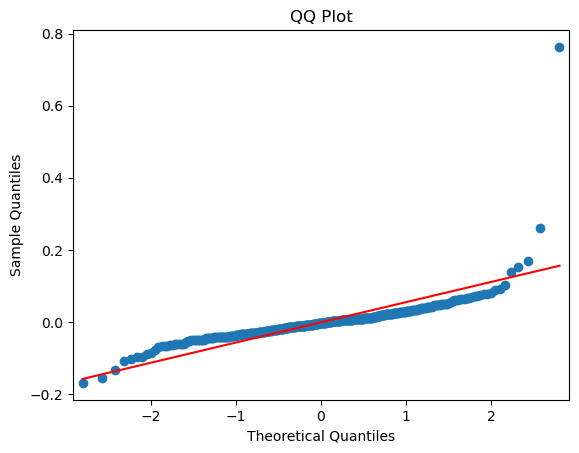

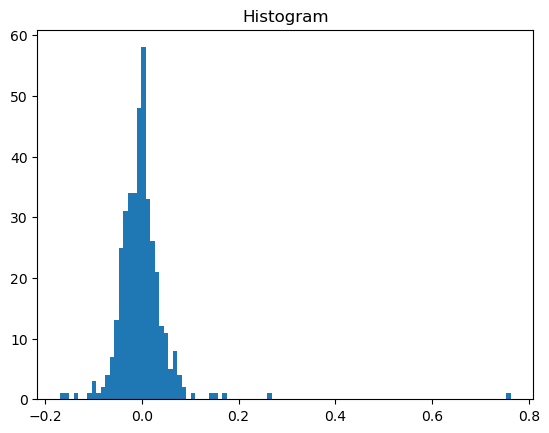

(<__main__.normality_test at 0x15d719ea0>,
 <__main__.normality_test at 0x15e704a90>)

In [17]:
test_3list(df2)

## 상관분석 

주가 비교

In [ ]:
plt.plot(df_dt['PX_LAST'], label='kakaobank')
plt.plot(df2_dt['PX_LAST'], label='kakaopay')
plt.legend()
plt.show

log 수익률 비교

In [ ]:
df_log = pd.Series([np.log(1+x/100) for x in df_dt['CHG_PCT_1D'].loc['2021-11-09':].tolist()])
df2_log = pd.Series([np.log(1+x/100) for x in df2_dt['CHG_PCT_1D'].loc['2021-11-09':].tolist()])

In [ ]:
plt.plot(df_log, label='kakaobank')
plt.plot(df2_log, label='kakaopay')
plt.legend()
plt.show

In [ ]:
# 누적 log 수익률

df_cum_log = np.cumprod(1 + df_log) - 1
df2_cum_log = np.cumprod(1 + df2_log) - 1

plt.plot(df_cum_log)
plt.plot(df2_cum_log)

In [ ]:
corr, p_value = pearsonr(df_log, df2_log)
print("상관계수:", corr)
print("p-value:", p_value)

기간별 log_수익률 비교

In [ ]:
# 시작 날짜와 종료 날짜 지정
start_date = datetime(2021, 11, 9)
end_date = datetime(2023, 6, 2)

# 날짜 범위 생성
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]
date_range = [x.strftime("%Y-%m-%d") for x in date_range]

df_memo = pd.DataFrame()

def long_term(df1, df2):
    corr_list = []
    p_value_list = []
    df1_ma5_cp1 = df1[['CHG_PCT_1D']]
    df2_ma5_cp1 = df2[['CHG_PCT_1D']]
    for date in date_range:
        if date == date_range[-1]:
            break
        sr1_log_ma5_cp1 = pd.Series([np.log(1+x/100) for x in df1_ma5_cp1.loc[date:]['CHG_PCT_1D']])
        sr2_log_ma5_cp1 = pd.Series([np.log(1+x/100) for x in df2_ma5_cp1.loc[date:]['CHG_PCT_1D']])
        corr, p_value = pearsonr(sr1_log_ma5_cp1, sr2_log_ma5_cp1)
        corr_list.append(corr)
        p_value_list.append(p_value)
    df_memo['corr'] = corr_list
    df_memo['p-value'] = p_value_list
    df_memo.index = date_range[:-1]
    return(df_memo)

In [ ]:
df_lt = long_term(df_dt_ma5_cp1, df2_dt_ma5_cp1)
df_lt

In [ ]:
plt.plot(df_lt['corr'])
plt.plot(df_lt['p-value'])
plt.axhline(y=0.05, color='red', linestyle='--')
plt.show()

ma5_log_수익률 비교

In [ ]:
normality_test(df_dt_ma5_cp1[['MA5_CP1']].loc['2021-08-12':])

In [ ]:
df_ma5_log = pd.Series([np.log(1+x/100) for x in df_dt_ma5_cp1.loc['2021-11-09':]['MA5_CP1']])

In [ ]:
normality_test(df_ma5_log)

In [ ]:
df2_ma5_log = pd.Series([np.log(1+x/100) for x in df2_dt_ma5_cp1.loc['2021-11-09':]['MA5_CP1']])

In [ ]:
normality_test(df2_ma5_log)

In [ ]:
plt.plot(df_ma5_log, label='kakaobank')
plt.plot(df2_ma5_log, label='kakaopay')
plt.legend()
plt.show

In [ ]:
corr, p_value = pearsonr(df_ma5_log, df2_ma5_log)
print("상관계수:", corr)
print("p-value:", p_value)

In [ ]:
# 누적 ma5 log 수익률

df_cum_ma5_log = np.cumprod(1 + df_ma5_log) - 1
df2_cum_ma5_log = np.cumprod(1 + df2_ma5_log) - 1

plt.plot(df_cum_ma5_log)
plt.plot(df2_cum_ma5_log)

In [ ]:
plt.plot(df_log)
plt.plot(df_ma5_log*100)

기간별 ma5_log_수익률 비교

In [ ]:
# 시작 날짜와 종료 날짜 지정
start_date = datetime(2021, 11, 9)
end_date = datetime(2023, 6, 2)

# 날짜 범위 생성
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]
date_range = [x.strftime("%Y-%m-%d") for x in date_range]

df_memo = pd.DataFrame()

def long_term(df1, df2):
    corr_list = []
    p_value_list = []
    df1_ma5_cp1 = df1[['MA5_CP1']]
    df2_ma5_cp1 = df2[['MA5_CP1']]
    for date in date_range:
        if date == date_range[-1]:
            break
        sr1_log_ma5_cp1 = pd.Series([np.log(1+x/100) for x in df1_ma5_cp1.loc[date:]['MA5_CP1']])
        sr2_log_ma5_cp1 = pd.Series([np.log(1+x/100) for x in df2_ma5_cp1.loc[date:]['MA5_CP1']])
        corr, p_value = pearsonr(sr1_log_ma5_cp1, sr2_log_ma5_cp1)
        corr_list.append(corr)
        p_value_list.append(p_value)
    df_memo['corr'] = corr_list
    df_memo['p-value'] = p_value_list
    df_memo.index = date_range[:-1]
    return(df_memo)

In [ ]:
df_lt = long_term(df_dt_ma5_cp1, df2_dt_ma5_cp1)
df_lt

In [ ]:
df1_ma5_cp1 = df_dt_ma5_cp1[['MA5_CP1']]
df2_ma5_cp1 = df2_dt_ma5_cp1[['MA5_CP1']]

In [ ]:
sr1_log_ma5_cp1 = pd.Series([np.log(1+x/100) for x in df1_ma5_cp1['MA5_CP1']])
sr2_log_ma5_cp1 = pd.Series([np.log(1+x/100) for x in df2_ma5_cp1['MA5_CP1']])


In [ ]:
pearsonr(sr1_log_ma5_cp1[-2:],sr2_log_ma5_cp1[-2:])

In [ ]:
sr1_log_ma5_cp1[-2:]

In [ ]:
sr2_log_ma5_cp1[-2:]

In [ ]:
pearsonr([0.000063,0.000097],[0.000031,0.000059])

In [ ]:
plt.plot(df_lt['corr'], label='kakaobank')
plt.plot(df_lt['p-value'], label='kakaopay')
plt.axhline(y=0.05, color='red', linestyle='--')
plt.legend()
plt.show()